Final Project code implementation

Inspiration from the paper, "Identifying maternal and infant factors associated with newborn size in rural Bangladesh by partial least squares (PLS) regression analysis" - PMC (nih.gov)

Link to dataset- 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5738092/bin/pone.0189677.s001.xlsx


In [2]:
#import dataset here 
import pandas as pd

data = pd.read_excel(r'C:\Users\qmcca\OneDrive\Desktop\dataFinalProjectBE175.xlsx')

#identify specific columns
weight = data['Weight']
length = data['Length']
MUAC = data['MUAC']
HC = data['HC']
CC = data['CC']
parity = data['Parity']
age = data['Age']
M_MUAC = data['M_MUAC']
LSI = data['LSI']
education = data['Education']
ANC = data['ANC']
male = data['Male']
PT = data['PT']
vitA = data['VitA']
Bcaro = data['Bcaro']
newID = data['newid']


First I will create the distribution histograms for each separate variable measured as in the diagonal of the matrix in figure 1. The maternal distributions are in blue and the infant distributions in red.

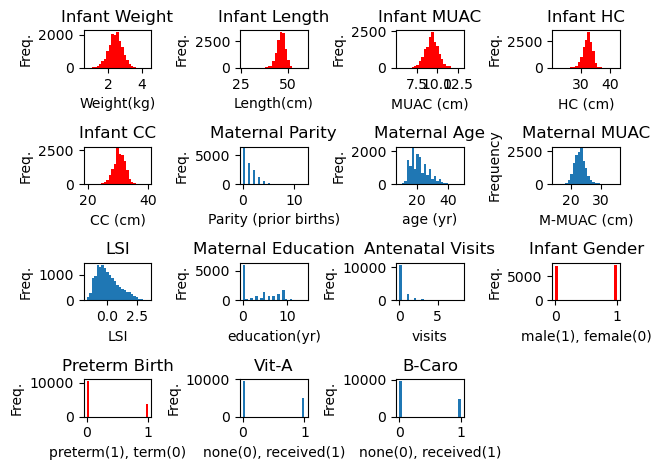

In [3]:
import matplotlib.pyplot as plt
#infant weight
plt.subplot(4,4, 1)
plt.hist(weight, bins=25, color ='red')
plt.xlabel('Weight(kg)')
plt.ylabel('Freq.')
plt.title('Infant Weight')

#infant length
plt.subplot(4,4, 2)
plt.hist(length, bins=25,color = 'red')
plt.xlabel('Length(cm)')
plt.ylabel('Freq.')
plt.title('Infant Length')

#infant Mid-upper arm circumference
plt.subplot(4,4, 3)
plt.hist(MUAC, bins=25,color ='red')
plt.xlabel('MUAC (cm)')
plt.ylabel('Freq.')
plt.title('Infant MUAC')

#infant head circumference
plt.subplot(4,4, 4)
plt.hist(HC, bins=25,color ='red')
plt.xlabel('HC (cm)')
plt.ylabel('Freq.')
plt.title('Infant HC')

#infant chest circumference
plt.subplot(4,4, 5)
plt.hist(CC, bins=25, color ='red' )
plt.xlabel('CC (cm)')
plt.ylabel('Freq.')
plt.title('Infant CC')

#maternal parity
plt.subplot(4,4, 6)
plt.hist(parity, bins=25)
plt.xlabel('Parity (prior births)')
plt.ylabel('Freq.')
plt.title('Maternal Parity')

#maternal age
plt.subplot(4,4, 7)
plt.hist(age, bins=25)
plt.xlabel('age (yr)')
plt.ylabel('Freq.')
plt.title('Maternal Age')

#maternal mid-upper arm circumference
plt.subplot(4,4, 8)
plt.hist(M_MUAC, bins=25)
plt.xlabel('M-MUAC (cm)')
plt.ylabel('Frequency')
plt.title('Maternal MUAC')

#living standard index
plt.subplot(4,4, 9)
plt.hist(LSI, bins=25)
plt.xlabel('LSI')
plt.ylabel('Freq.')
plt.title('LSI')

#maternal education
plt.subplot(4,4, 10)
plt.hist(education, bins=25)
plt.xlabel('education(yr)')
plt.ylabel('Freq.')
plt.title('Maternal Education')

#Antenatal visits
plt.subplot(4,4, 11)
plt.hist(ANC, bins=25)
plt.xlabel('visits')
plt.ylabel('Freq.')
plt.title('Antenatal Visits')

#infant gender
plt.subplot(4,4, 12)
plt.hist(male, bins=25, color = 'red')
plt.xlabel('male(1), female(0)')
plt.ylabel('Freq.')
plt.title('Infant Gender')

#Preterm birth
plt.subplot(4,4, 13)
plt.hist(PT, bins=25, color = 'red')
plt.xlabel('preterm(1), term(0)')
plt.ylabel('Freq.')
plt.title('Preterm Birth')

#Vitamin A supplementation
plt.subplot(4,4, 14)
plt.hist(vitA, bins=25)
plt.xlabel('none(0), received(1)')
plt.ylabel('Freq.')
plt.title('Vit-A')

#B-Carotene supplementation
plt.subplot(4,4, 15)
plt.hist(Bcaro, bins=25)
plt.xlabel('none(0), received(1)')
plt.ylabel('Freq.')
plt.title('B-Caro')


plt.tight_layout()
plt.show()

The most notable trends that can be seen from these distributions include, over half of the infants in this study were small at birth, there was about a 27% rate of preterm birth, the male born to female born infants was about 1:1. The number of mothers that received vitamin-A and B-carotene supplementation is much lower than those who didn't. About 75% of mothers did not attend any ANC visits. The mean age of the mothers in this study was 22 years.

Next I will create a similar correlation matrix for the variables, but using the heatmap feature of python.

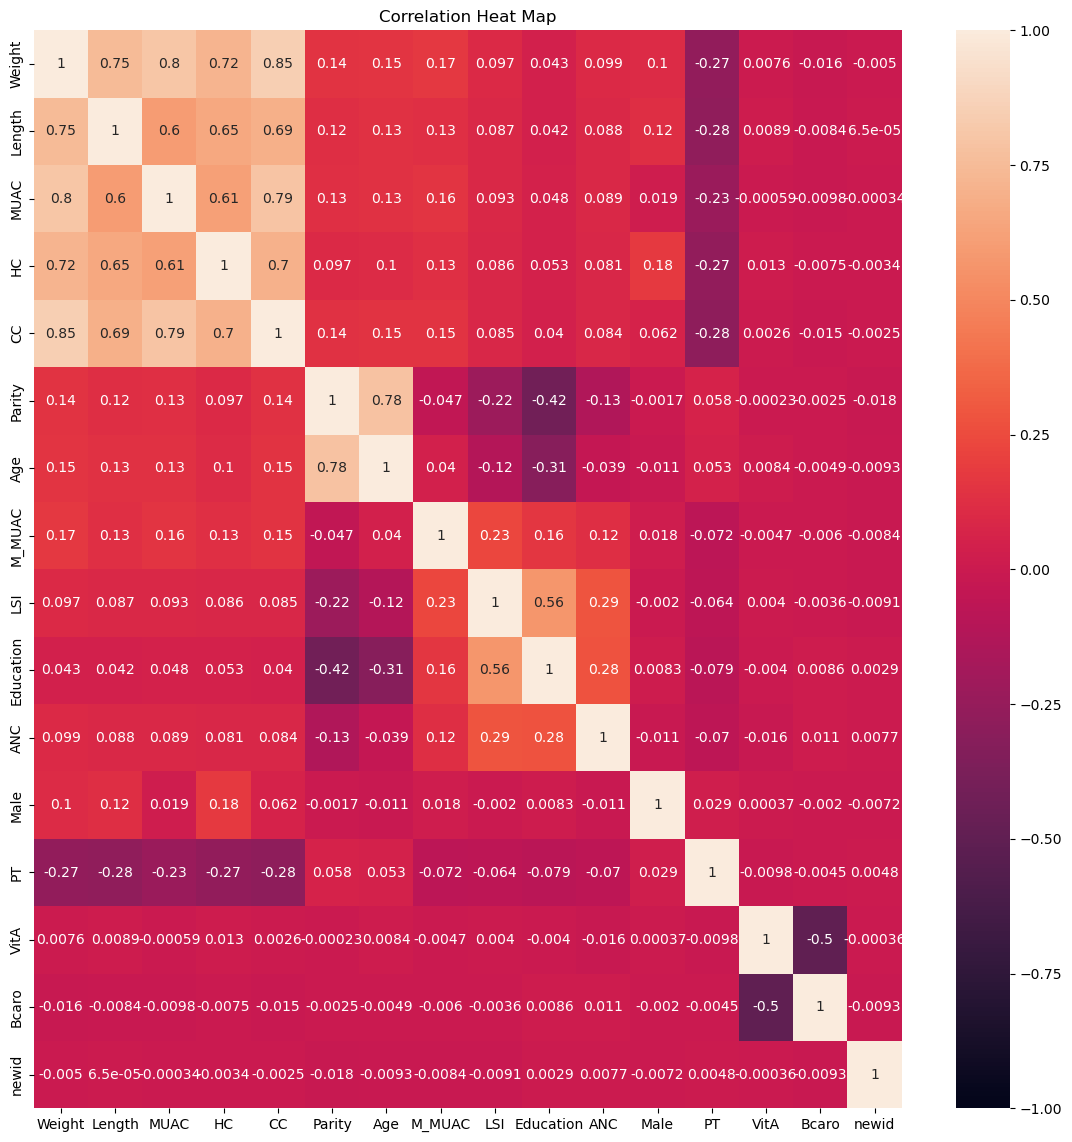

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#create the heat map plot
plt.figure(figsize=(14, 14))
plt.title('Correlation Heat Map')
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)



All of the dependent variables are highly, positively correlated with one another as seen in the top left corner of this plot. The sociodemographic maternal variables are also positively correlated with the dependent variables. Preterm birth is the most negatively correlated predictor variable.

Next, I will resemble figure 4, the loadings correlation plot along the first two principal comonents, using PCA.


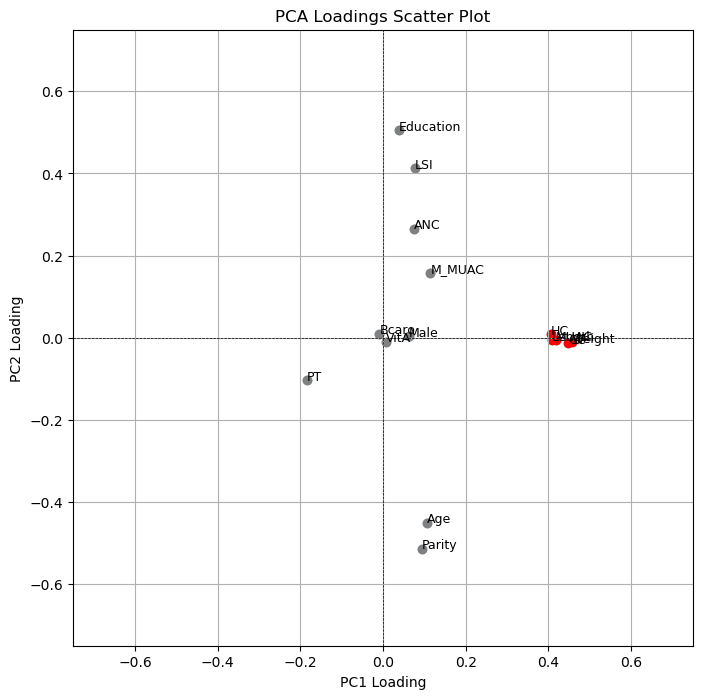

In [5]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X = data[['Weight', 'Length', 'MUAC', 'HC', 'CC', 'Parity', 'Age', 'M_MUAC', 'LSI', 'Education', 'ANC', 'Male', 'PT', 'VitA', 'Bcaro']]

#normalize 
x_scale = scale(X)

#fit PCA model
pca = PCA()
pca.fit(x_scale)

#get loadings 
loadings = -pca.components_.T

#plot loadings
plt.figure(figsize=(8, 8))
plt.scatter(loadings[:, 0], loadings[:, 1], alpha=0.6)
plt.title('PCA Loadings Scatter Plot')
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')

#add variable names
for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    plt.text(x, y, X.columns[i], fontsize=9)
#color the dependent variables  
variables_of_interest = ['Weight', 'Length', 'CC', 'HC', 'MUAC']
for i, var in enumerate(X.columns):
    if var in variables_of_interest:
        plt.scatter(loadings[i, 0], loadings[i, 1], color='red', label=var)
    else:
        plt.scatter(loadings[i, 0], loadings[i, 1], color='gray')
#plot
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlim(-.75,.75)
plt.ylim(-.75,.75)
plt.show()



All of the dependent variables vary together positively along the first principal component and in no significant direction along the second principal component. The sociodemographic maternal factors are also all positively correlated along PC1, which is consistent with the correlation plot. Vitamin-A and Beta-Carotene supplementation seem to have no significant trend along either component indicating a non-significant relationship to birth size. Preterm birth is the only negative loading along PC1, indicating a negative relationship to birth size, consistent with the correlation map.

Using PLSR I will attempt to replicate figure 5 from the paper to see how the scores from the model split into 4 distinct groups based on gender and whether the birth was term or preterm. 

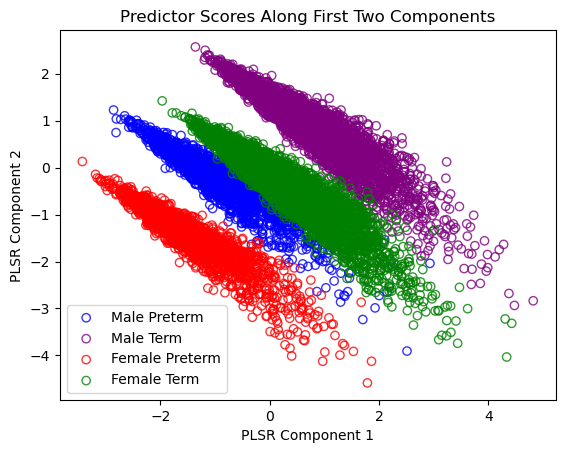

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
#create a unified array of all size variables.
size = np.array(data[['Weight', 'Length','MUAC','HC','CC']])
#separate features and target
X = data[['Parity', 'Age', 'M_MUAC', 'LSI', 'Education', 'ANC', 'Male', 'PT', 'VitA', 'Bcaro']]
y = size

#fit PLSR model
plsrModel = PLSRegression(n_components=2, scale = True)
plsrModel.fit_transform(X,y)
scores = plsrModel.x_scores_


#plot the scores along with color based on category
male_preterm = plt.scatter(-scores[(data['Male'] == 1) & (data['PT'] == 1), 0], scores[(data['Male'] == 1) & (data['PT'] == 1), 1],  label='Male Preterm',  edgecolor = 'blue', facecolor = 'none', alpha = 0.8)
male_term = plt.scatter(-scores[(data['Male'] == 1) & (data['PT'] == 0), 0], scores[(data['Male'] == 1) & (data['PT'] == 0), 1],  label='Male Term', edgecolor = 'purple', facecolor = 'none',alpha = 0.8)
female_preterm = plt.scatter(-scores[(data['Male'] == 0) & (data['PT'] == 1), 0], scores[(data['Male'] == 0) & (data['PT'] == 1), 1],  label='Female Preterm', edgecolor = 'red', facecolor = 'none',alpha = 0.8)
female_term = plt.scatter(-scores[(data['Male'] == 0) & (data['PT'] == 0), 0], scores[(data['Male'] == 0) & (data['PT'] == 0), 1],  label='Female Term', edgecolor = 'green', facecolor = 'none',alpha = 0.8)
#create plot
plt.xlabel('PLSR Component 1')
plt.ylabel('PLSR Component 2')
plt.title('Predictor Scores Along First Two Components')
plt.legend(handles=[male_preterm, male_term, female_preterm, female_term], loc='lower left')


From this plot, we can see that the predictors for infant size split into 4 distinct categories as shown in the paper's results as well. These categories are split based on whether the child was born preterm and their gender at birth. There is a negative trend of preterm birth along both PLSR components, and there is a less significant, but still negative, trend for if the baby was born female along both components as well.

Next, I will run cross-validation on my model to determine the accuracy of prediction for my model and whether these results line up with the results achieved in the paper using RMSE analysis.

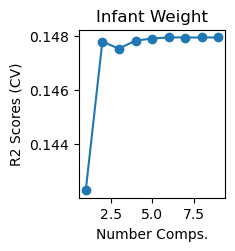

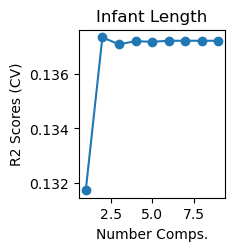

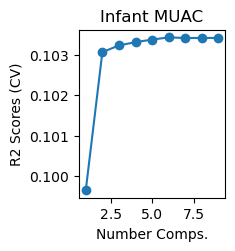

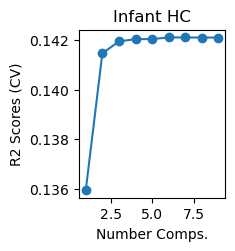

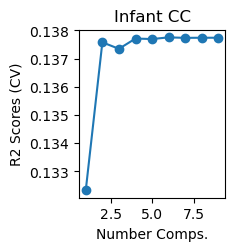

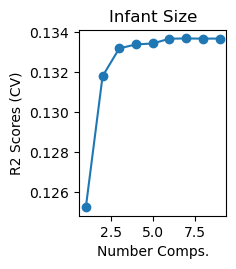

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
import numpy as np
import matplotlib.pyplot as plt
num_rows = 2
num_columns = 3
#infant weight
n_components_range = range(1, 10)
scores = np.zeros(len(n_components_range))
for i, n_components in enumerate(n_components_range):
    plsrModel = PLSRegression(n_components=n_components, scale=True)
    scores[i] = np.mean(cross_val_score(plsrModel, X, y[:,0], cv=10, scoring = 'r2'))  
plt.subplot(num_rows,num_columns, 1)
plt.plot(n_components_range, scores, marker='o')
plt.xlabel('Number Comps.')
plt.ylabel('R2 Scores (CV)')
plt.title('Infant Weight')
plt.show()
#infant length
n_components_range = range(1, 10)
scores = np.zeros(len(n_components_range))
for i, n_components in enumerate(n_components_range):
    plsrModel = PLSRegression(n_components=n_components, scale=True)
    scores[i] = np.mean(cross_val_score(plsrModel, X, y[:,1], cv=10, scoring = 'r2')) 
plt.subplot(num_rows,num_columns, 2)
plt.plot(n_components_range, scores, marker='o')
plt.xlabel('Number Comps.')
plt.ylabel('R2 Scores (CV)')
plt.title('Infant Length')
plt.show()
#infant Mid upper arm circumference
n_components_range = range(1, 10)
scores = np.zeros(len(n_components_range))
for i, n_components in enumerate(n_components_range):
    plsrModel = PLSRegression(n_components=n_components, scale=True)
    scores[i] = np.mean(cross_val_score(plsrModel, X, y[:,2], cv=10, scoring = 'r2'))  
plt.subplot(num_rows,num_columns, 3)
plt.plot(n_components_range, scores, marker='o')
plt.xlabel('Number Comps.')
plt.ylabel('R2 Scores (CV)')
plt.title('Infant MUAC')
plt.show()
#infant head circumference
n_components_range = range(1, 10)
scores = np.zeros(len(n_components_range))
for i, n_components in enumerate(n_components_range):
    plsrModel = PLSRegression(n_components=n_components, scale=True)
    scores[i] = np.mean(cross_val_score(plsrModel, X, y[:,3], cv=10, scoring = 'r2')) 
plt.subplot(num_rows,num_columns, 4)
plt.plot(n_components_range, scores, marker='o')
plt.xlabel('Number Comps.')
plt.ylabel('R2 Scores (CV)')
plt.title('Infant HC')
plt.show()
#infant chest circumference
n_components_range = range(1, 10)
scores = np.zeros(len(n_components_range))
for i, n_components in enumerate(n_components_range):
    plsrModel = PLSRegression(n_components=n_components, scale=True)
    scores[i] = np.mean(cross_val_score(plsrModel, X, y[:,4], cv=10, scoring = 'r2'))  
plt.subplot(num_rows,num_columns, 5)
plt.plot(n_components_range, scores, marker='o')
plt.xlabel('Number Comps.')
plt.ylabel('R2 Scores (CV)')
plt.title('Infant CC')
plt.show()
#infant size
n_components_range = range(1, 10)
scores = np.zeros(len(n_components_range))
for i, n_components in enumerate(n_components_range):
    plsrModel = PLSRegression(n_components=n_components, scale=True)
    scores[i] = np.mean(cross_val_score(plsrModel, X, y, cv=10, scoring = 'r2'))  
plt.subplot(num_rows,num_columns, 6)
plt.plot(n_components_range, scores, marker='o')
plt.xlabel('Number Comps.')
plt.ylabel('R2 Scores (CV)')
plt.title('Infant Size')
plt.tight_layout()
plt.show()



From these results, it can be seen that the R^2 scores are low at all component numbers, and this indicates that the model built does not perform accurately when predicting birth size. This is consistent with the paper's results using RMSE analysis, as their prediction error was high at all component numbers, but became lower and lower up until the second principal component.